# Assignment
# 🏨 Hotel Reservation Cancellation - Neural Network Challenge

## 🧩 Problem Description

Hotel managers often face a serious challenge: **last-minute reservation cancellations**. Predicting whether a reservation will be canceled in advance helps optimize room availability, reduce losses, and improve customer service.

In this assignment, you’ll build a **binary classification model** using an **Artificial Neural Network (ANN)** to predict **whether a hotel reservation will be canceled** based on various features like booking time, number of guests, room type, deposit type, and more.

---

## 🎯 Learning Goals

This assignment is designed not just to build an accurate model, but to **deeply understand how model architecture and training strategies affect performance**. You'll:

- Learn how underfitting and overfitting look on real data.
- Use regularization techniques (Dropout, EarlyStopping).
- Simplify architectures to control model complexity.
- Try **Batch Normalization** and assess its impact.

---

## 🛠️ Your Tasks

1. **Preprocess the Data**
   - Load the hotel reservation dataset (Already down for you below).
   - Handle missing values, encode categorical variables, and scale numeric features.
   - split data into train/validation/test splits

2. **Build a Baseline ANN Model**
   - Use a simple architecture to establish a baseline.
   - Evaluate performance on validation and test sets.

3. **Generate Underfitting**
   - Intentionally create an **underfit** model (e.g., one small hidden layer, too few epochs).
   - Plot the training vs validation loss/accuracy.
   - 📌 **Fix it** by increasing model capacity or training time.

4. **Generate Overfitting**
   - Create a model that **overfits** (e.g., too many layers, too wide, too long training).
   - Plot and analyze the gap between training and validation performance.
   - 📌 **Fix it using:**
     - Dropout layers
     - EarlyStopping callback
     - Reducing complexity (fewer neurons/layers)

5. **Experiment with Batch Normalization**
   - Add BatchNormalization layers.
   - Compare training dynamics with and without it over the same number of epochs.

6. **Summarize What You Learned**
   - Write a short reflection on:
     - How you diagnosed each problem (underfit/overfit)
     - Which solution worked best and why
     - What advice you'd give your past self about designing ANN architectures for tabular data

---

## 📊 Metrics to Use

- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- Visuals of training/validation accuracy & loss

---

## 📦 Deliverables

- Your well-commented code (Jupyter or Colab notebook on Github)
- Short written reflections as markdown cells
- Visualizations and explanation of decisions


## Load the data

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from tensorflow.keras import models, layers, regularizers, optimizers
from keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [194]:
hotel = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/hotel.csv')


In [195]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [196]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [197]:
print(hotel.duplicated().sum())


31994


In [198]:
hotel.drop_duplicates(inplace=True)

In [199]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [200]:
hotel.drop('company', axis=1, inplace=True)
hotel['country'] = hotel['country'].fillna(X['country'].mode()[0])
hotel['agent'] = hotel['agent'].fillna(X['agent'].mode()[0])


In [201]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [202]:
hotel.drop('children', axis=1, inplace=True)


In [203]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0


In [204]:
X = hotel.copy()
y = X.pop('is_canceled')

In [205]:
X.drop(columns=['reservation_status'], inplace=True)

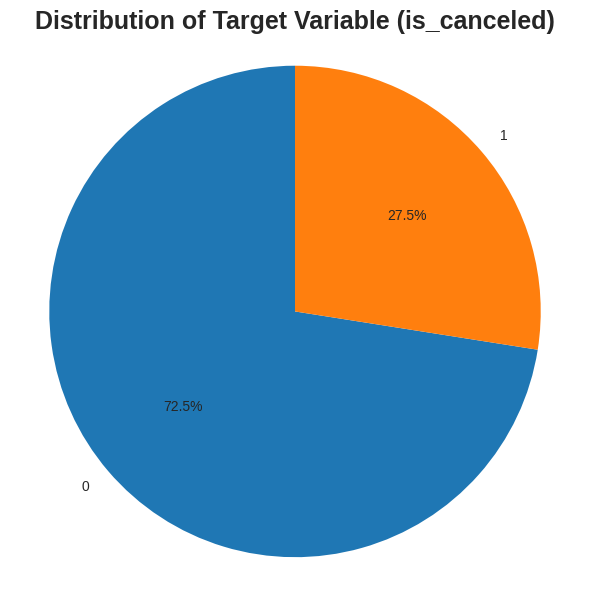

In [206]:

target_counts = y.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable (is_canceled)')
plt.axis('equal')
plt.show()


In [207]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

In [208]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [209]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])


In [210]:
X_processed = preprocessor.fit_transform(X)


In [120]:
X.drop(columns=['reservation_status'], inplace=True)

In [216]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

In [140]:
print(X_resampled.shape)
print(y_resampled.shape)

(126742, 1181)
(126742,)


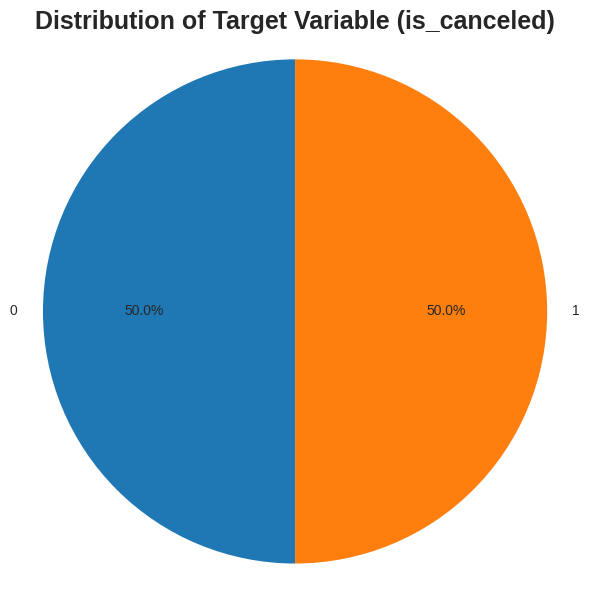

In [217]:
target_counts = y_resampled.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable (is_canceled)')
plt.axis('equal')
plt.show()


In [218]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42) # 70% training, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split the 30% temp data into 15% validation and 15% test

In [143]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(88719, 1181)
(88719,)
(19011, 1181)
(19011,)
(19012, 1181)
(19012,)


In [162]:
def build_baseline_model(input_dim):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

baseline_model = build_baseline_model(X_train.shape[1])
history_baseline = baseline_model.fit(X_train, y_train,
                                      validation_data=(X_val, y_val),
                                      epochs=10, batch_size=32, verbose=1)

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x79c7e46f6d40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


2773/2773 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - accuracy: 0.7685 - loss: 0.4983 - val_accuracy: 0.8343 - val_loss: 0.4144
Epoch 2/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8440 - loss: 0.3990 - val_accuracy: 0.8541 - val_loss: 0.3862
Epoch 3/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8666 - loss: 0.3663 - val_accuracy: 0.8743 - val_loss: 0.3593
Epoch 4/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8902 - loss: 0.3367 - val_accuracy: 0.8803 - val_loss: 0.3449
Epoch 5/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9120 - loss: 0.2993 - val_accuracy: 0.9115 - val_loss: 0.3049
Epoch 6/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9249 - loss: 0.2739 - val_accuracy: 0.9250 - val_loss: 0.2772
Epoch 7/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9321 - loss: 0.2587 - val_accuracy: 0.9310 - val_loss: 0.2643
Epoch 8/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9358 - loss: 0.2472 - va

In [188]:
y_pred = (baseline_model.predict(X_test) > 0.5).astype('int32')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


595/595 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[[9468  143]
 [ 343 9058]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.97      9611
           1       0.98      0.96      0.97      9401

    accuracy                           0.97     19012
   macro avg       0.97      0.97      0.97     19012
weighted avg       0.97      0.97      0.97     19012



In [219]:
def build_underfit_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(1, activation='sigmoid',
                     kernel_regularizer=regularizers.l2(1.0))  # Very strong L2
    ])
    model.compile(optimizer=optimizers.SGD(learning_rate=0.001),  # Very low LR
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

underfit_model = build_underfit_model(X_train.shape[1])
history = underfit_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=5, batch_size=512, verbose=1)


Epoch 1/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5213 - loss: 2.3845 - val_accuracy: 0.5407 - val_loss: 1.6778
Epoch 2/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5489 - loss: 1.5272 - val_accuracy: 0.5814 - val_loss: 1.1764
Epoch 3/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5926 - loss: 1.1016 - val_accuracy: 0.6293 - val_loss: 0.9272
Epoch 4/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6340 - loss: 0.8902 - val_accuracy: 0.6601 - val_loss: 0.8033
Epoch 5/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6579 - loss: 0.7851 - val_accuracy: 0.6735 - val_loss: 0.7416


In [187]:
y_pred = (underfit_model.predict(X_test) > 0.5).astype('int32')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


595/595 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
[[4609 5002]
 [1254 8147]]
              precision    recall  f1-score   support

           0       0.79      0.48      0.60      9611
           1       0.62      0.87      0.72      9401

    accuracy                           0.67     19012
   macro avg       0.70      0.67      0.66     19012
weighted avg       0.70      0.67      0.66     19012



In [220]:
def build_overfit_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

overfit_model = build_overfit_model(X_train.shape[1])
history2 = overfit_model.fit(X_train, y_train,
                                      validation_data=(X_val, y_val),
                                      epochs=10, batch_size=32, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7917 - loss: 0.4303 - val_accuracy: 0.9001 - val_loss: 0.2469
Epoch 2/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9233 - loss: 0.1906 - val_accuracy: 0.9456 - val_loss: 0.1436
Epoch 3/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9643 - loss: 0.0961 - val_accuracy: 0.9574 - val_loss: 0.1116
Epoch 4/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9762 - loss: 0.0663 - val_accuracy: 0.9633 - val_loss: 0.1004
Epoch 5/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9820 - loss: 0.0487 - val_accuracy: 0.9692 - val_loss: 0.0884
Epoch 6/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9863 - loss: 0.0371 - val_accuracy: 0.9693 - val_loss: 0.0915
Epoch 7/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9888 - loss: 0.0299 - val_accuracy: 0.9691 - val_loss: 0.0884
Epoch 8/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9900 - loss: 0

In [186]:
y_pred = (overfit_model.predict(X_test) > 0.5).astype('int32')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


595/595 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
[[8359 1252]
 [1289 8112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      9611
           1       0.87      0.86      0.86      9401

    accuracy                           0.87     19012
   macro avg       0.87      0.87      0.87     19012
weighted avg       0.87      0.87      0.87     19012



In [174]:

def build_regularized_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

regularized_model = build_regularized_model(X_train.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = regularized_model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=10,
                                batch_size=32,
                                callbacks=[early_stop],
                                verbose=1)


Epoch 1/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 138s 48ms/step - accuracy: 0.7695 - loss: 0.5446 - val_accuracy: 0.8232 - val_loss: 0.4365
Epoch 2/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8267 - loss: 0.4397 - val_accuracy: 0.8546 - val_loss: 0.4033
Epoch 3/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8484 - loss: 0.4133 - val_accuracy: 0.8704 - val_loss: 0.3858
Epoch 4/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8641 - loss: 0.3924 - val_accuracy: 0.8912 - val_loss: 0.3505
Epoch 5/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8787 - loss: 0.3706 - val_accuracy: 0.8924 - val_loss: 0.3473
Epoch 6/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.8855 - loss: 0.3552 - val_accuracy: 0.9087 - val_loss: 0.3141
Epoch 7/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8917 - loss: 0.3455 - val_accuracy: 0.9128 - val_loss: 0.3131
Epoch 8/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8952 - loss:

In [185]:
y_pred = (regularized_model.predict(X_test) > 0.5).astype('int32')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


595/595 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
[[8707  904]
 [ 612 8789]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      9611
           1       0.91      0.93      0.92      9401

    accuracy                           0.92     19012
   macro avg       0.92      0.92      0.92     19012
weighted avg       0.92      0.92      0.92     19012



In [177]:
def build_bn_dropout_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),  # Dropout after activation

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),  # Dropout after activation

        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model
bn_dropout_model = build_bn_dropout_model(X_train.shape[1])
history_bn_dropout = bn_dropout_model.fit(X_train, y_train,
                                          validation_data=(X_val, y_val),
                                          epochs=10,
                                          batch_size=32,
                                          verbose=1)

Epoch 1/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.7442 - loss: 0.5094 - val_accuracy: 0.8532 - val_loss: 0.3404
Epoch 2/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.8356 - loss: 0.3645 - val_accuracy: 0.8965 - val_loss: 0.2557
Epoch 3/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8731 - loss: 0.2945 - val_accuracy: 0.9310 - val_loss: 0.1928
Epoch 4/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8985 - loss: 0.2440 - val_accuracy: 0.9459 - val_loss: 0.1524
Epoch 5/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9093 - loss: 0.2203 - val_accuracy: 0.9537 - val_loss: 0.1337
Epoch 6/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9212 - loss: 0.1986 - val_accuracy: 0.9584 - val_loss: 0.1177
Epoch 7/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9259 - loss: 0.1865 - val_accuracy: 0.9631 - val_loss: 0.1098
Epoch 8/10
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9325 - loss: 0

In [182]:
y_pred = (bn_dropout_model.predict(X_test) > 0.5).astype('int32')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


595/595 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


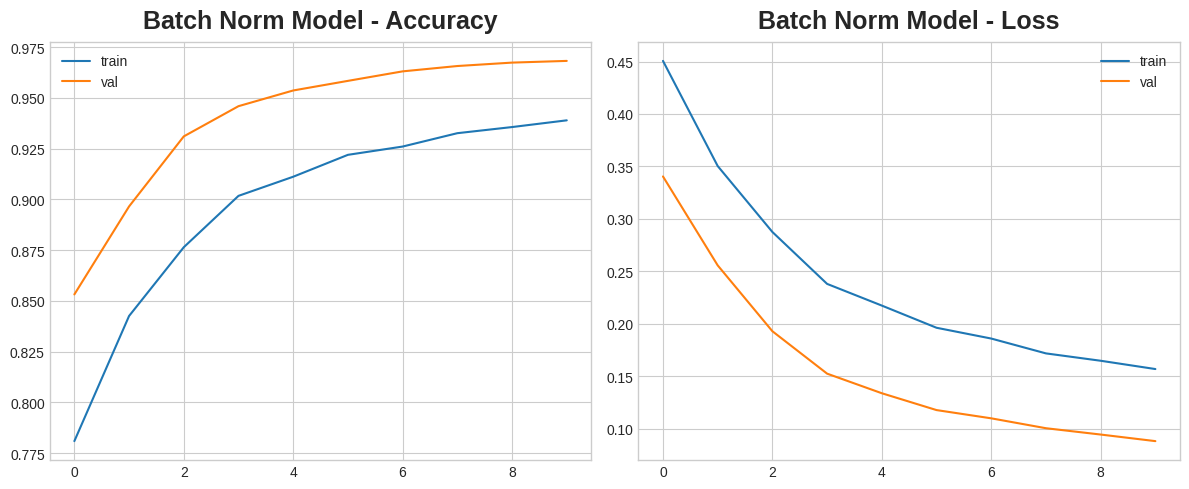

In [183]:

def plot_history(history, title='Model Performance'):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()
#batchnorm model
plot_history(history_bn_dropout, title='Batch Norm Model')


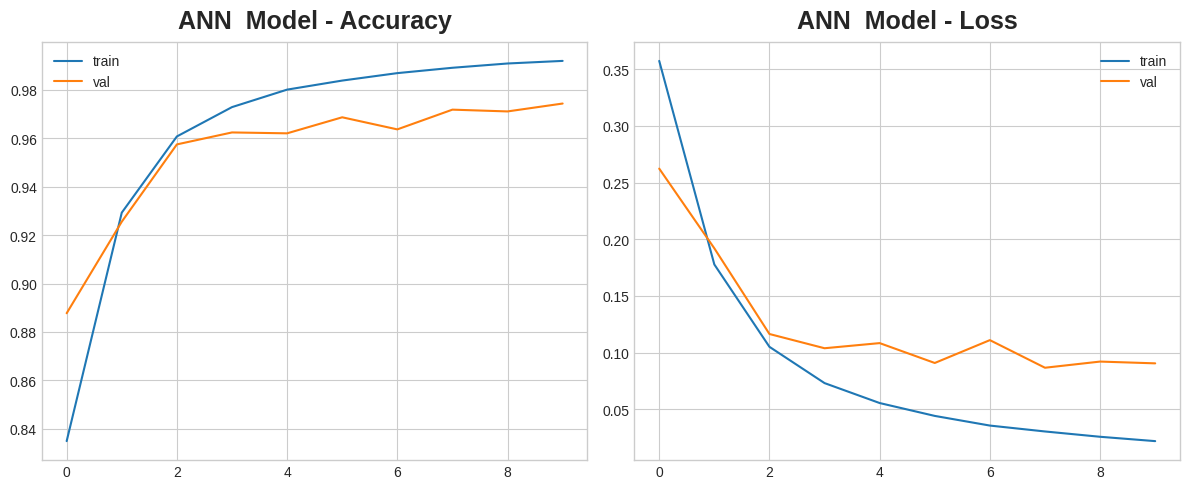

In [192]:
#The ANN model
plot_history(history_baseline, title='ANN  Model')


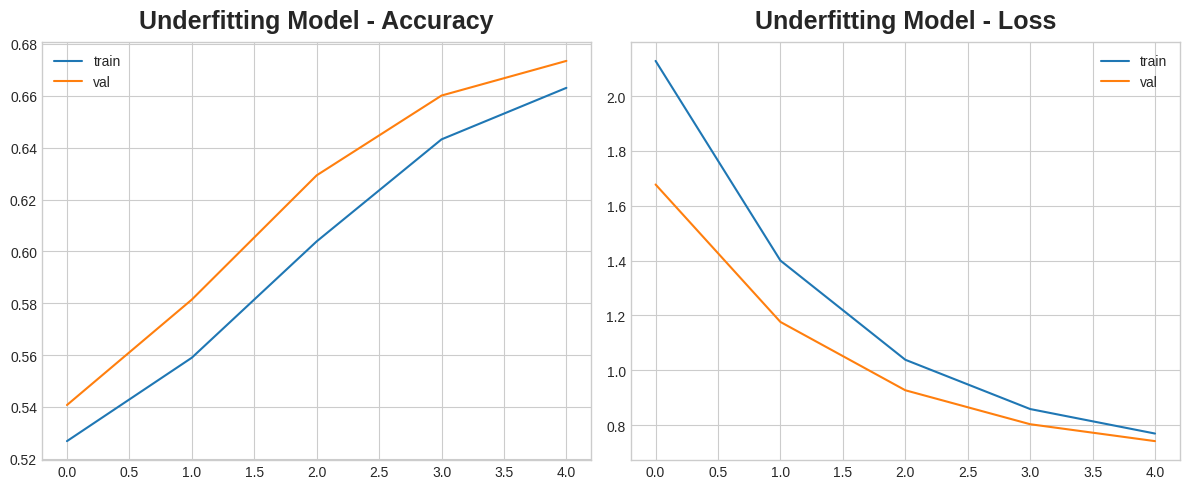

In [221]:
#underfitting model
plot_history(history, title='Underfitting Model')


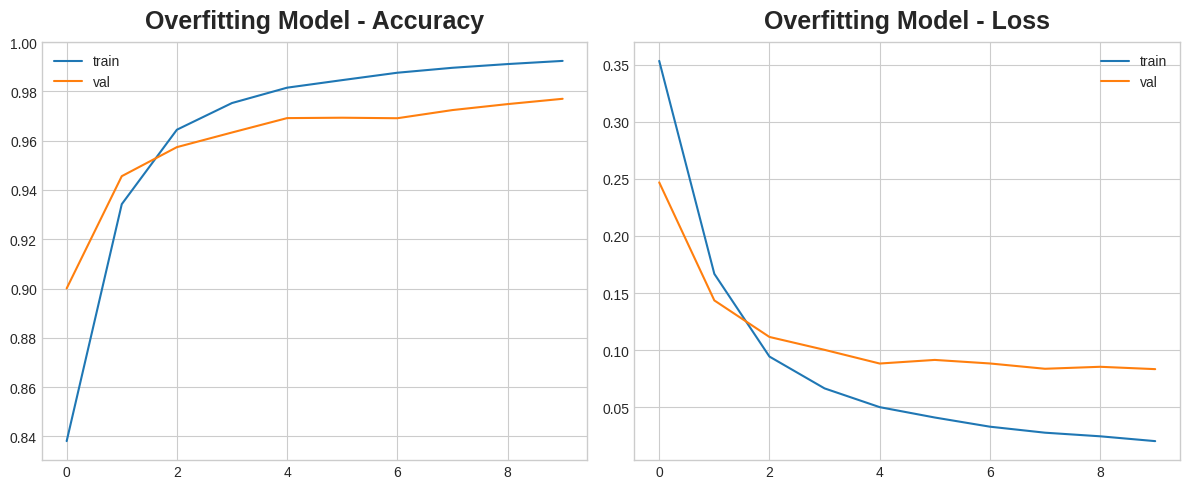

In [222]:
#Overfitting model
plot_history(history2, title='Overfitting Model')
